In [1]:
import pandas as pd

df=pd.read_csv("delivery.csv")

df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [2]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [4]:
df.duplicated().sum()

0

In [5]:
## segregate  numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical Columns :", numerical_columns)
print("Categorical Columns :", categorical_columns)

Numerical Columns : Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')
Categorical Columns : Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [6]:

df[categorical_columns].describe()

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,45584,43853,45584,44968,44983,45584,45584,45356,44384
unique,45584,1320,44,176,193,6,4,4,4,2,3
top,0xcdcd,JAPRES11DEL02,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,1192,461,495,7653,15476,11530,26429,44460,34087


In [7]:
df['Weather_conditions'].value_counts()

Weather_conditions
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: count, dtype: int64

In [8]:
df['Type_of_order'].value_counts()


Type_of_order
Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: count, dtype: int64

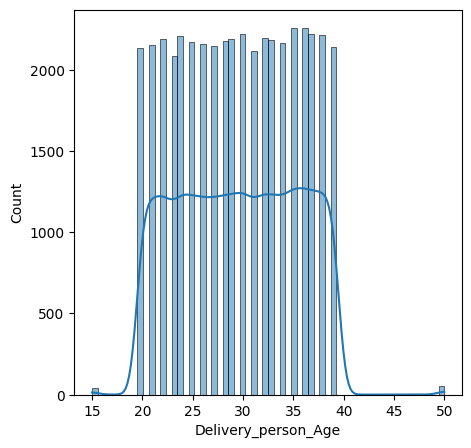

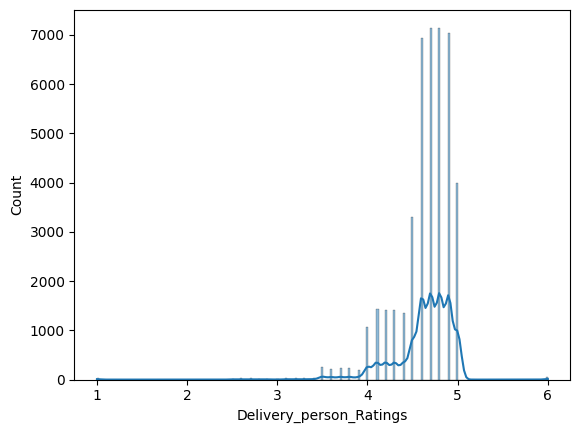

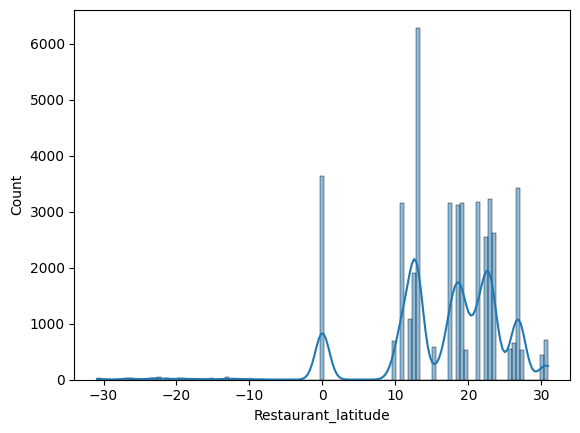

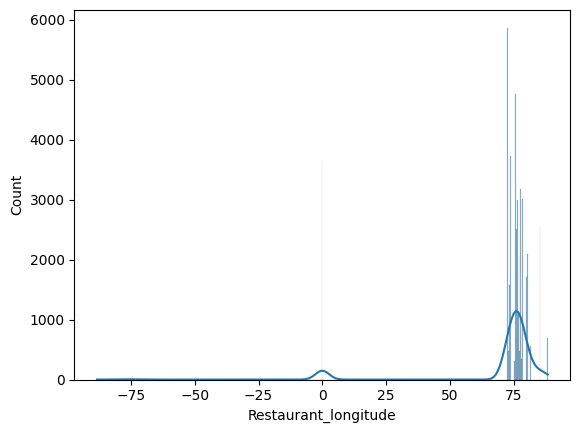

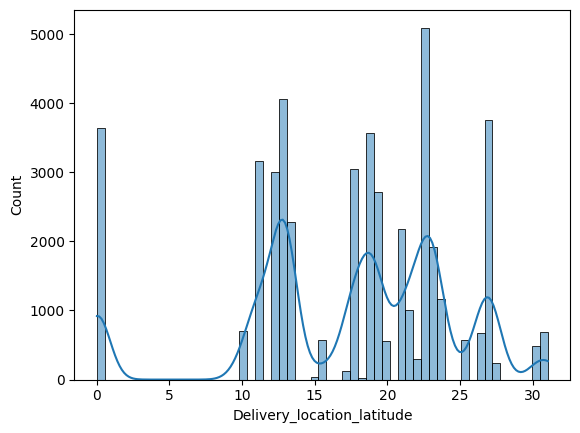

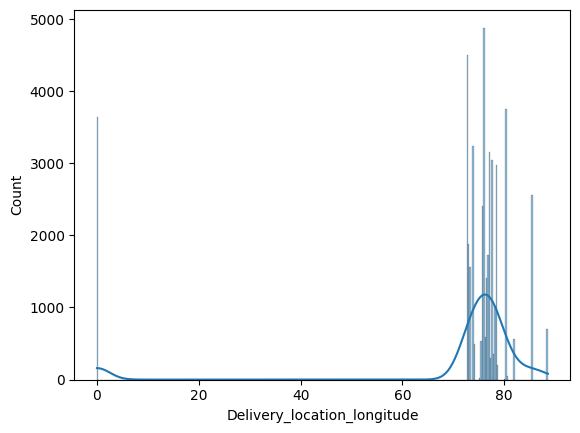

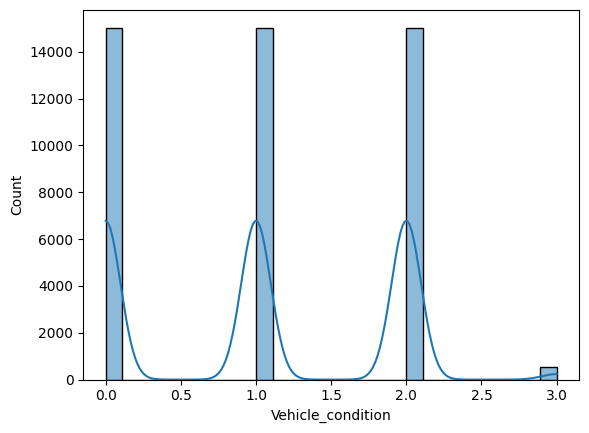

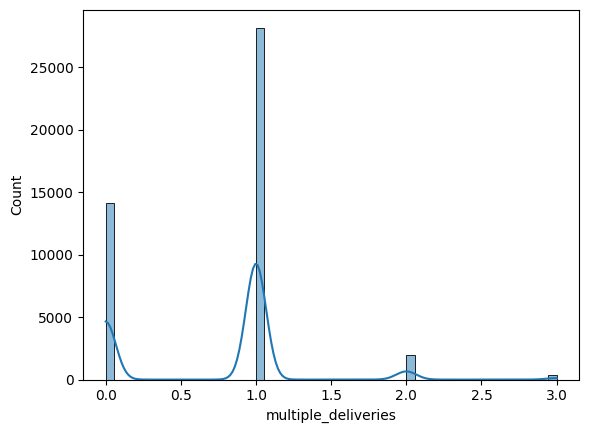

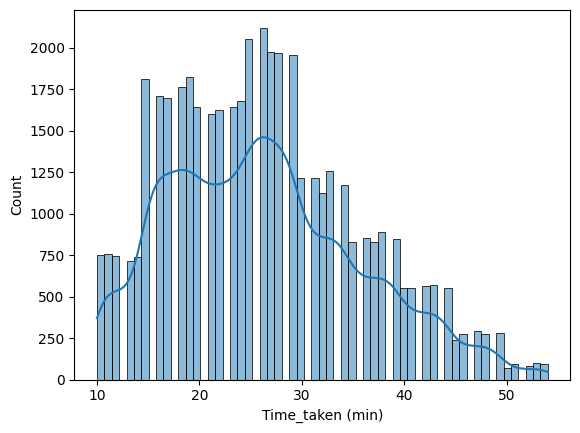

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

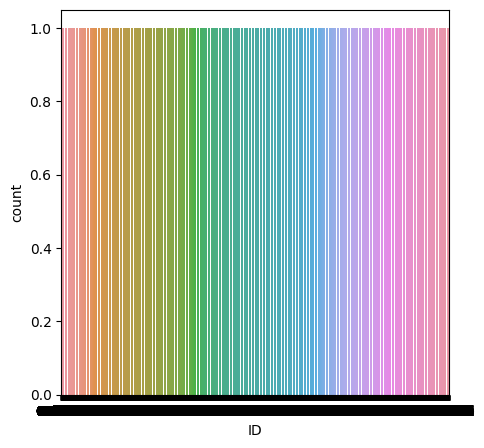

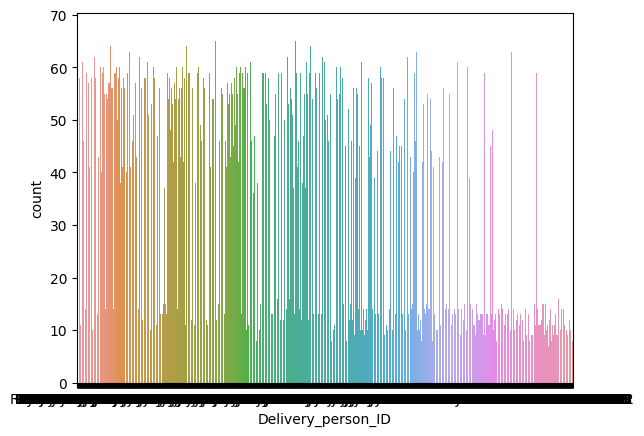

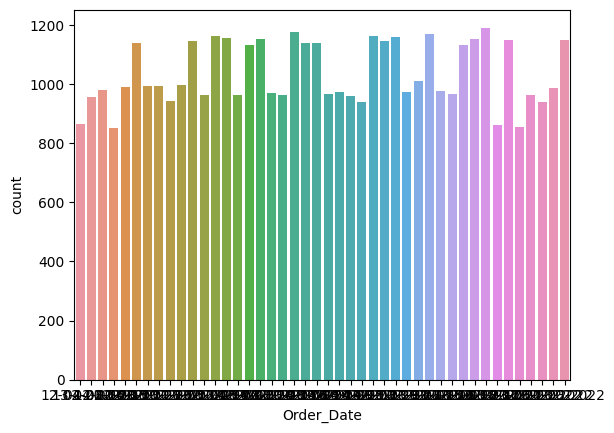

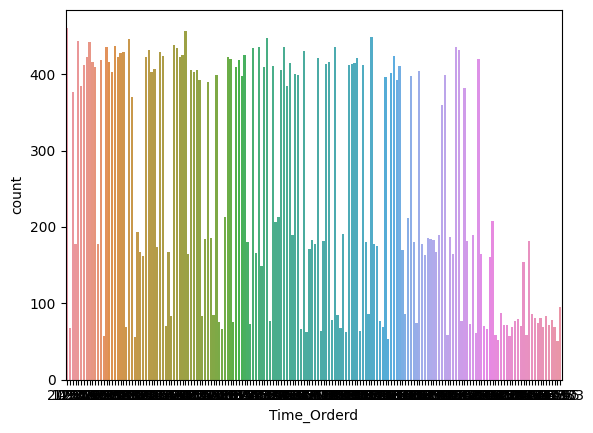

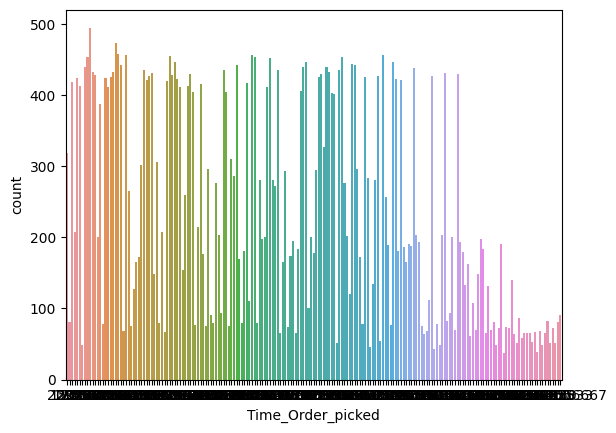

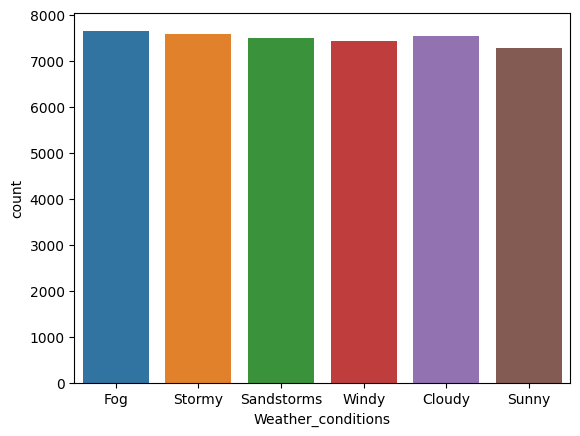

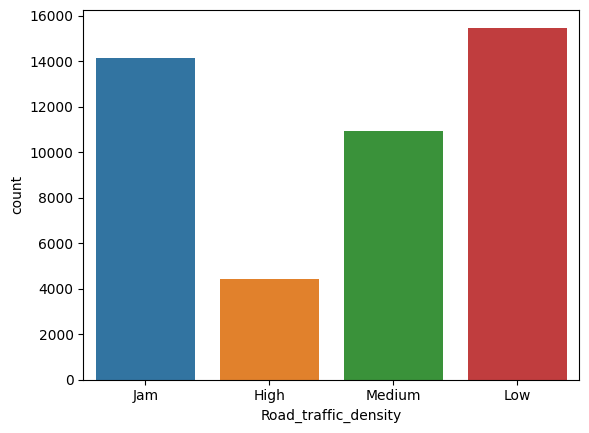

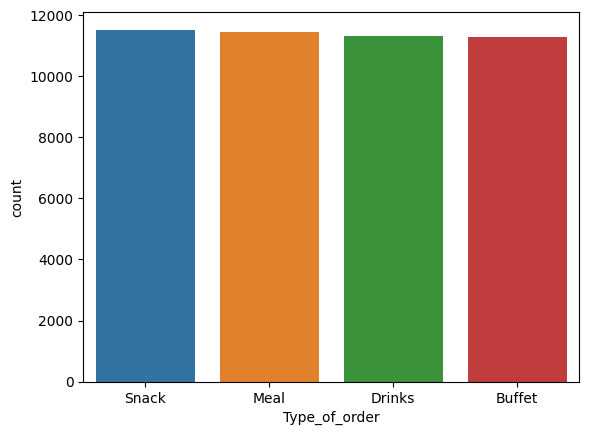

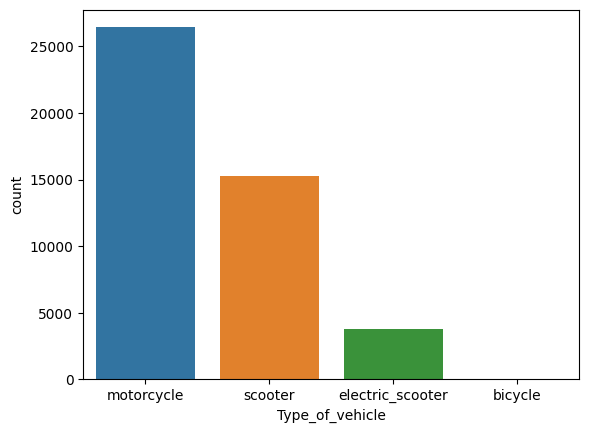

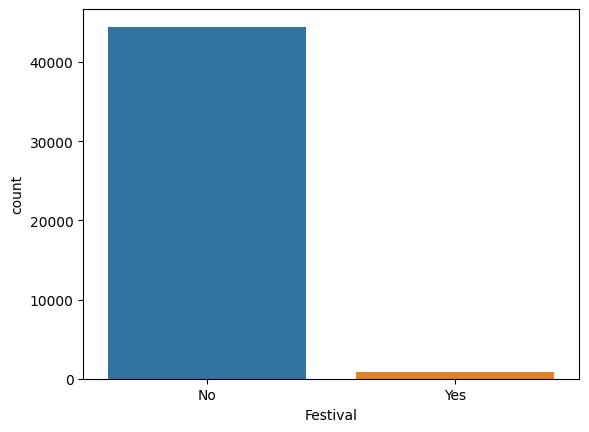

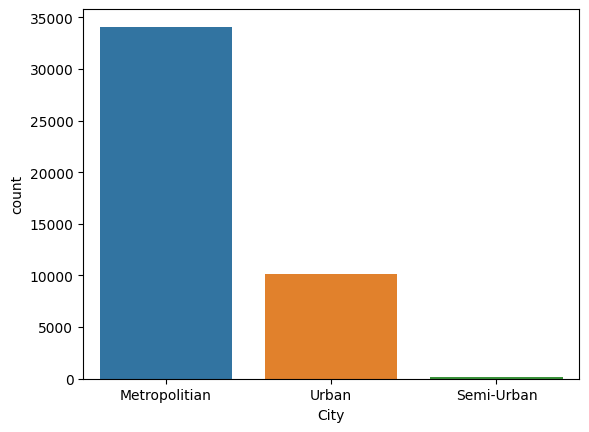

In [10]:
plt.figure(figsize=(5,5))
x=1
for i in categorical_columns:
    
    sns.countplot(data=df,x=i)
    print('\n')
    plt.show()

In [12]:
import numpy as np
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  
# Calculate the distance between each pair of points
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'], 
                                        df.loc[i, 'Restaurant_longitude'], 
                                        df.loc[i, 'Delivery_location_latitude'], 
                                        df.loc[i, 'Delivery_location_longitude'])

In [13]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


In [14]:
##We will not drop as of now but it can be removed because these are highly correlated with 
df=df.drop(labels=['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],axis=1)

In [15]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,21.0,4.7,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,23.0,4.7,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,34.0,4.3,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,24.0,4.7,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


In [16]:
df['Order_Date']=pd.to_datetime(df['Order_Date'],dayfirst=True)

In [18]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,2022-02-12,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,21.0,4.7,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,23.0,4.7,2022-03-04,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,34.0,4.3,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,24.0,4.7,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


In [19]:
df['day']=df['Order_Date'].dt.day
df['month']=df['Order_Date'].dt.month
df['year']=df['Order_Date'].dt.year

In [20]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,day,month,year
0,36.0,4.2,2022-02-12,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582,12,2,2022
1,21.0,4.7,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319,13,2,2022
2,23.0,4.7,2022-03-04,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860,4,3,2022
3,34.0,4.3,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258,13,2,2022
4,24.0,4.7,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618,14,2,2022


In [21]:
df=df.drop(labels=['Order_Date'],axis=1)

In [22]:
df['Order_Hour']=df['Time_Orderd'].str.split(':').str[0]
df['Order_Min']=df['Time_Orderd'].str.split(':').str[1]
df.drop('Time_Orderd',axis=1,inplace=True)

In [23]:
df['Picked_Hour']=df['Time_Order_picked'].str.split(':').str[0]
df['Picked_Min']=df['Time_Order_picked'].str.split(':').str[1]
df.drop('Time_Order_picked',axis=1,inplace=True)

In [24]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582,12,2,2022,21,55,22,10
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319,13,2,2022,14,55,15,05
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860,4,3,2022,17,30,17,40
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258,13,2,2022,09,20,09,30
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618,14,2,2022,19,50,20,05


In [25]:
df.to_csv('delivery_clean.csv', index=False)

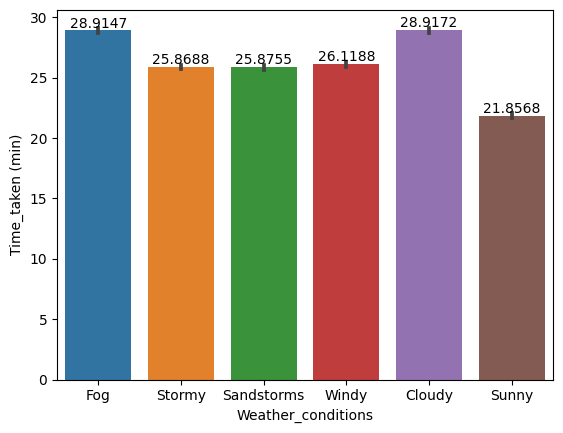

In [26]:
ax=sns.barplot(x ='Weather_conditions', y ='Time_taken (min)', data = df)
for i in ax.containers:
    ax.bar_label(i,)

<Axes: xlabel='Road_traffic_density', ylabel='Time_taken (min)'>

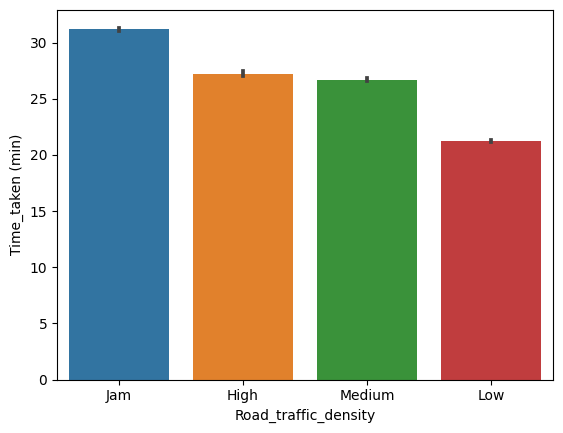

In [27]:
sns.barplot(x ='Road_traffic_density', y ='Time_taken (min)', data = df)

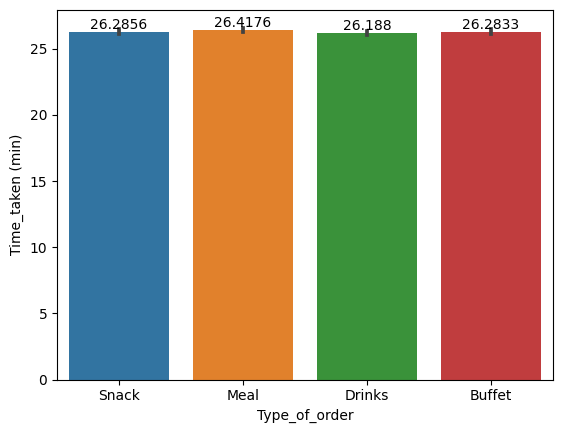

In [28]:
ax=sns.barplot(x ='Type_of_order', y ='Time_taken (min)', data = df)
for i in ax.containers:
    ax.bar_label(i,)

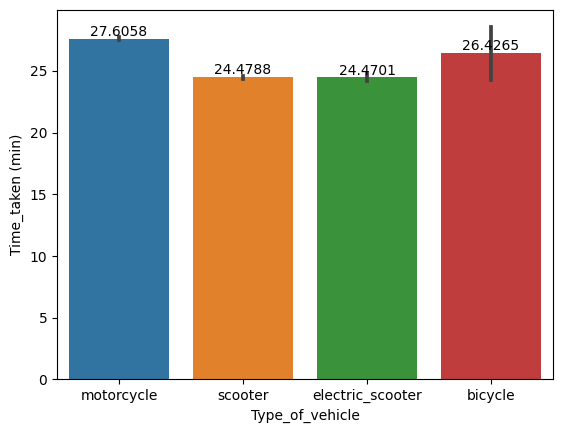

In [29]:
ax=sns.barplot(x ='Type_of_vehicle', y ='Time_taken (min)', data = df)
for i in ax.containers:
    ax.bar_label(i,)

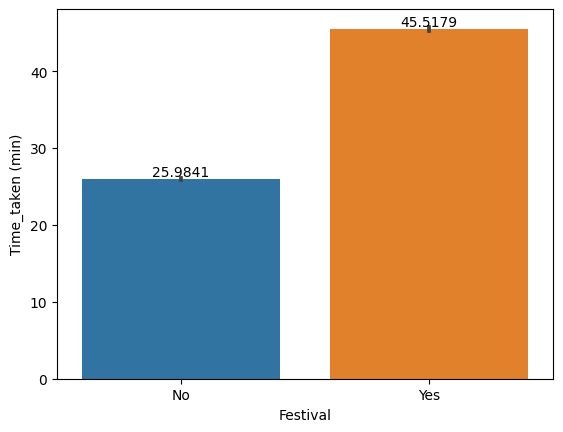

In [30]:
ax=sns.barplot(x ='Festival', y ='Time_taken (min)', data = df)
for i in ax.containers:
    ax.bar_label(i,)

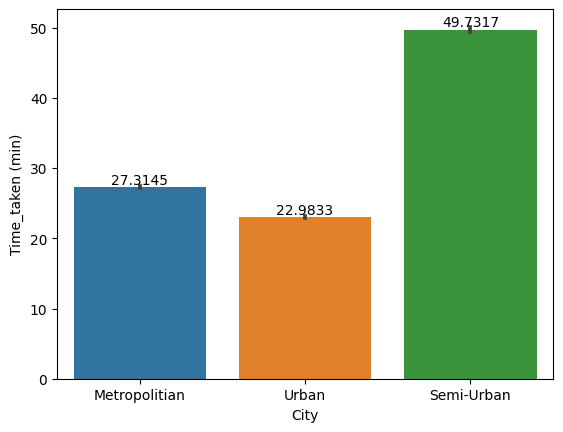

In [32]:
ax=sns.barplot(x ='City', y ='Time_taken (min)', data = df)
for i in ax.containers:
    ax.bar_label(i,)

In [33]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582,12,2,2022,21,55,22,10
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319,13,2,2022,14,55,15,05
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860,4,3,2022,17,30,17,40
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258,13,2,2022,09,20,09,30
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618,14,2,2022,19,50,20,05


In [34]:
df=pd.read_csv('delivery_clean.csv')

In [35]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582,12,2,2022,21.0,55.0,22.0,10.0
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319,13,2,2022,14.0,55.0,15.0,5.0
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860,4,3,2022,17.0,30.0,17.0,40.0
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258,13,2,2022,9.0,20.0,9.0,30.0
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618,14,2,2022,19.0,50.0,20.0,5.0


In [36]:
df=df.drop(labels=['Type_of_order'],axis=1)

In [37]:
Weather_conditions_Map={"Sunny":1,"Windy":2,"Sandstorms":2,"Stormy":2,"Fog":3,"Cloudy":3}
Road_Traffic_Map={"Low":1,"Medium":2,"High":3,"Jam":4}

Type_of_vehicle_map={"scooter":1,"electric_scooter":1,"bicycle":2,"motorcycle":2}
Festival_Map={"No":1,"Yes":2}
City_Map={"Urban":1,"Metropolitian":2,"Semi-Urban":3}

In [38]:
df['Weather_conditions']=df['Weather_conditions'].replace(Weather_conditions_Map)
df['Road_traffic_density']=df['Road_traffic_density'].replace(Road_Traffic_Map)
df['Type_of_vehicle']=df['Type_of_vehicle'].map(Type_of_vehicle_map)
df['Festival']=df['Festival'].map(Festival_Map)
df['City']=df['City'].map(City_Map)

In [39]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,day,month,year,Order_Hour,Order_Min,Picked_Hour,Picked_Min
0,36.0,4.2,3.0,4.0,2,2,3.0,1.0,2.0,46,10.280582,12,2,2022,21.0,55.0,22.0,10.0
1,21.0,4.7,2.0,3.0,1,2,1.0,1.0,2.0,23,6.242319,13,2,2022,14.0,55.0,15.0,5.0
2,23.0,4.7,2.0,2.0,1,1,1.0,1.0,2.0,21,13.787860,4,3,2022,17.0,30.0,17.0,40.0
3,34.0,4.3,2.0,1.0,0,2,0.0,1.0,2.0,20,2.930258,13,2,2022,9.0,20.0,9.0,30.0
4,24.0,4.7,3.0,4.0,1,1,1.0,1.0,2.0,41,19.396618,14,2,2022,19.0,50.0,20.0,5.0


<Axes: >

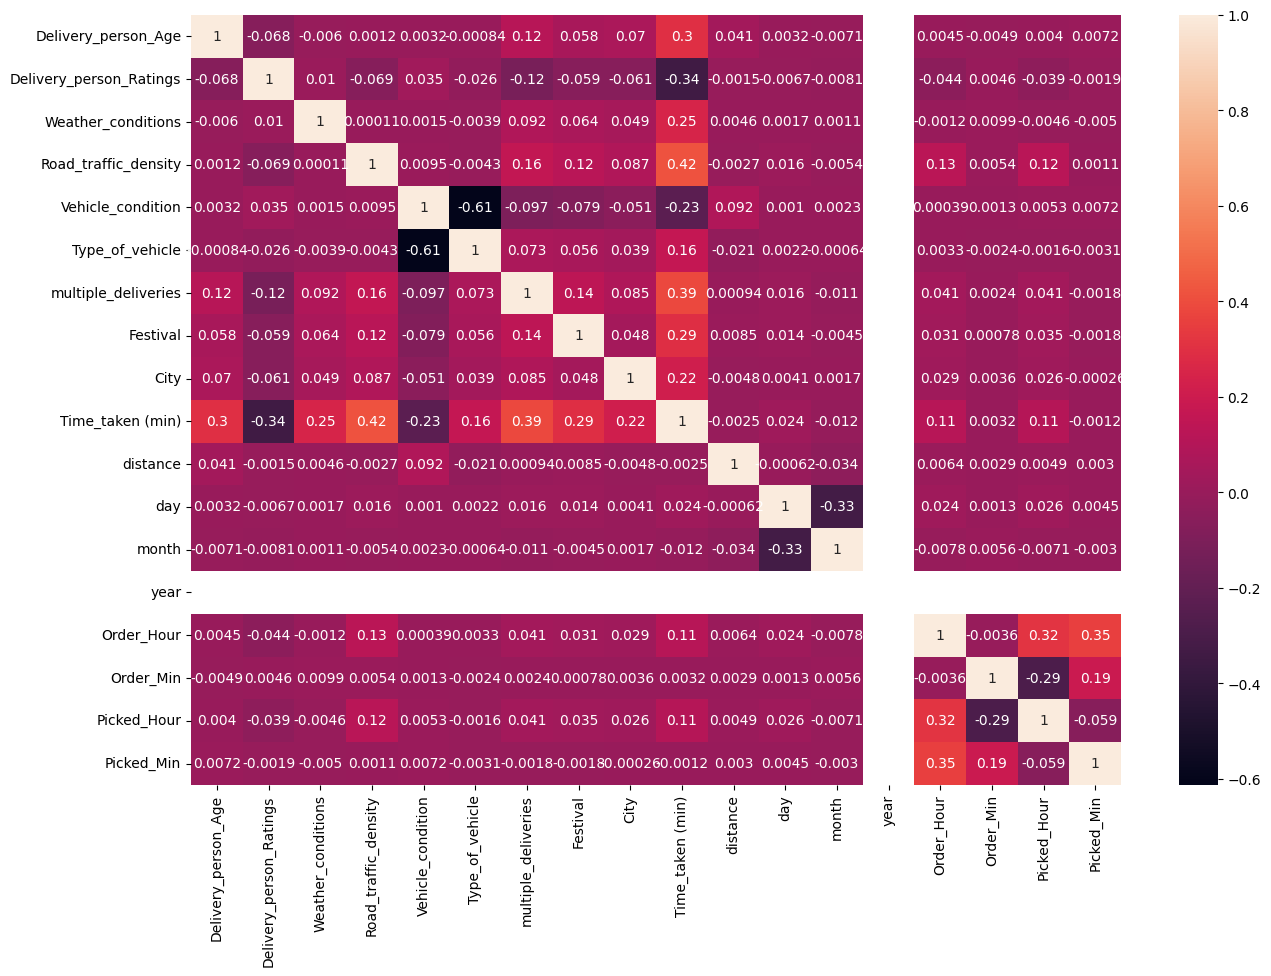

In [43]:

## correlation
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True)

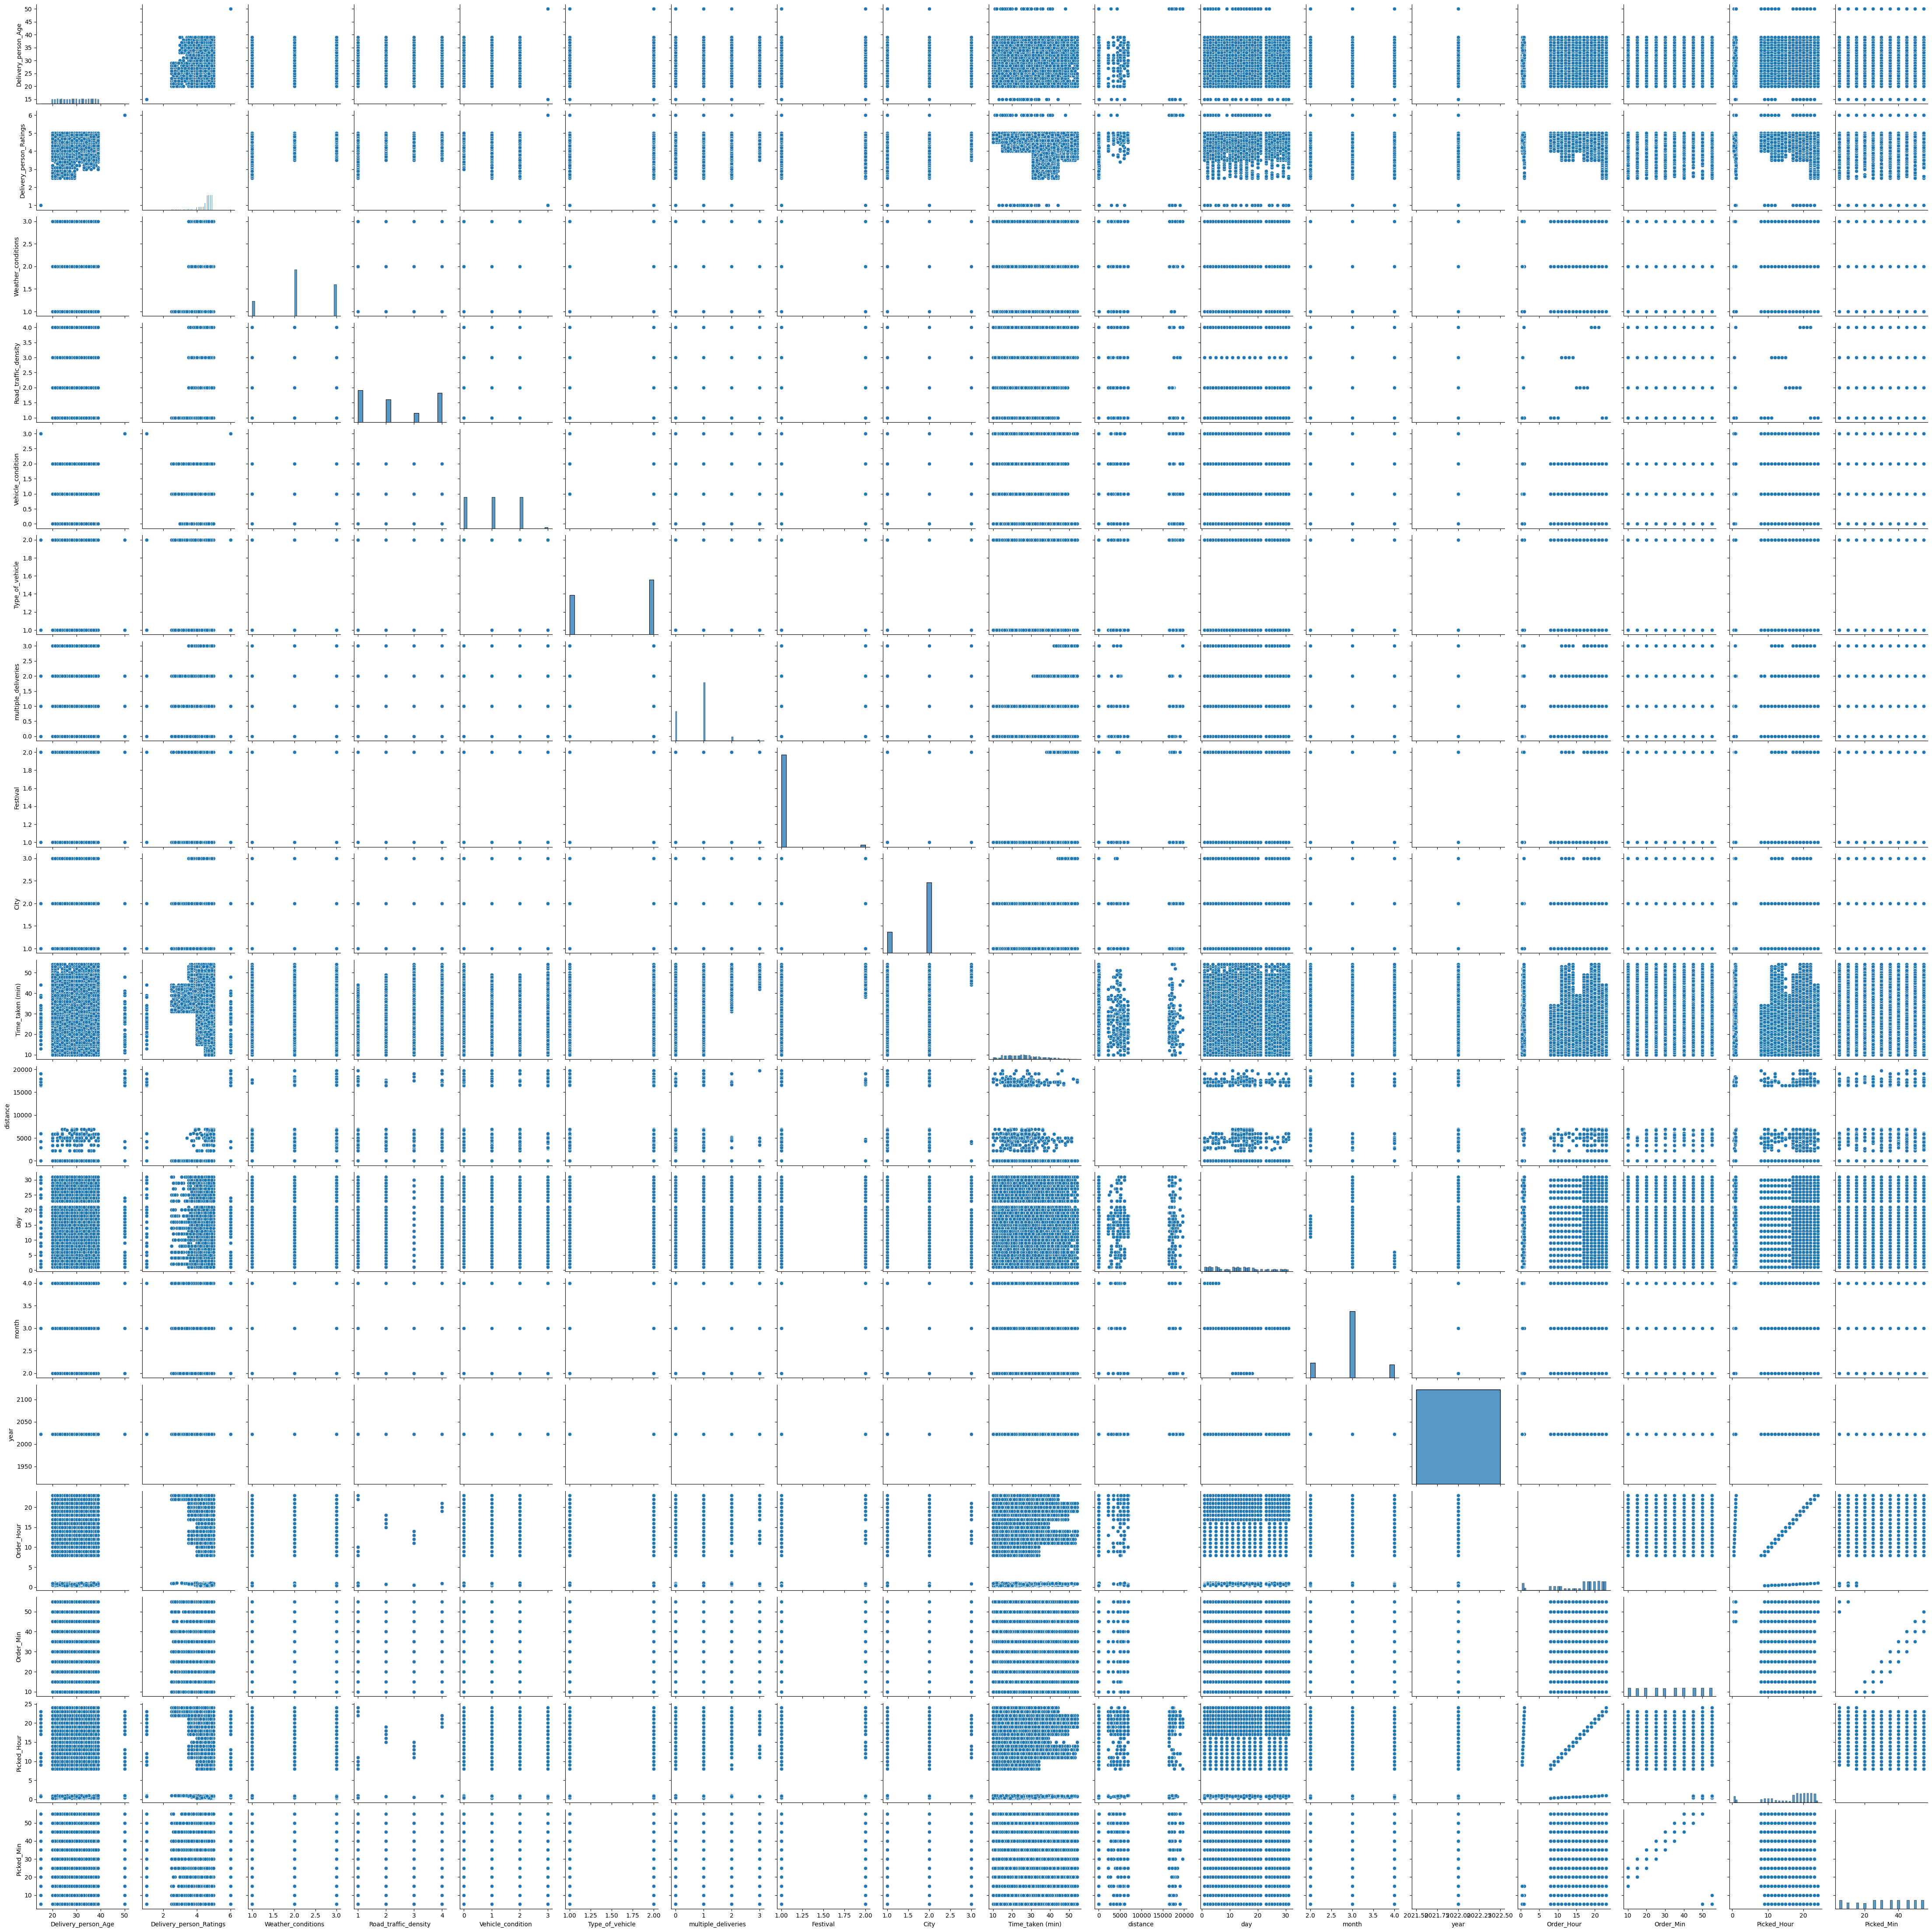

In [44]:
sns.pairplot(df)